# 1. Naive Bayes

## 1.1. Giới thiệu

Thuật toán Naive Bayes là một nhóm các thuật toán phân loại dựa trên Định lý Bayes, đặc biệt phù hợp với các bài toán phân loại văn bản, như lọc email spam, phân loại tài liệu, và phân tích tình cảm. Naive Bayes được gọi là "naive" (ngây thơ) vì giả định rằng các đặc trưng (features) của dữ liệu là độc lập với nhau.

Là các phương pháp học phân lớp có giám sát và dựa trên một mô hình (hàm) xác suất. Việc phân loại dựa trên các giá trị xác suất của các khả năng
xảy ra của các giả thiết. Thuật toán dựa trên định lý Bayes (Bayes theorem)

## 1.2. Định lý Bayes

\begin{equation}
    P(h|D) = \frac{P(D|h)*P(h)}{P(D)}
\end{equation}

  - Trong đó:

    - $P(D)$: Xác suất trước (tiên nghiệm) của việc quan sát được dữ liệu $D$

    - $P(h)$: Xác suất trước (tiên nghiệm) của giả thiết $h$

    - $P(D|h)$: Xác suất xảy ra của dữ liệu $D$, nếu biết giả thiết $h$ là đúng.

    - $P(h|D)$: Xác suất (hậu nghiệm) của giả thiết $h$ là đúng, nếu quan sát được dữ liệu $D$

- Xác xuất hậu nghiệm cực đại (MAP):

  Với một tập các giả thiết (các phân lớp) có thể $H$, hệ thống sẽ tìm giả
thiết có thể xảy ra nhất $h$ đối với các dữ liệu quan sát được $D$. Nghĩa là tìm h sao cho $P(h|D)$ là max

\begin{equation}
    h_{MAP} = \text{argmax}_{h\in H} P(h|D)
\end{equation}

- Đánh giá khả năng có thể nhất (MLE)

  Phương pháp MLE tìm giả thiết cực đại hóa giá trị $P(D|h)$; trong đó $P(D|h)$ được gọi là khả năng có thể (likelihood) của dữ liệu $D$ đối với $h$

\begin{equation}
    h_{ML} = \text{argmax}_{h\in H} P(D|h)
\end{equation}



## 1.3. Định lý Bayes trong Naive Bayes

- Khi áp dụng định lý vào bài toán phân loại chúng ta có:

  \begin{equation}
    P(C|X) = \frac{P(X|C)*P(C)}{P(X)}
  \end{equation}

  Trong đó:

    -  $P(C|X)$ là xác suất lớp $C$ khi biết dữ liệu $X$
    -  $P(X|C)$ là xác suất dữ liệu $X$ khi biết lớp $C$
    -  $P(C)$ là xác suất tiên nghiệm của lớp $C$
    -  $P(X)$ là xác suất tiên nghiệm của dữ liệu $X$

  Vì $P(X)$ là hằng số với mọi lớp $C$, nên có thể bỏ qua khi so sánh các lớp với nhau

  \begin{equation}
    P(C|X) = P(X|C)*P(C)
  \end{equation}

  Naive Bayes cũng giả định các đặc trưng của dữ liệu là độc lập với nhau nên

  \begin{equation}
    P(X|C) = P(x_1,x_2,x_3,...,x_n|C) = P(x_1|C).P(x_2|C).P(x_3|C)....P(x_n|C)
  \end{equation}

    Với $x_1,x_2,x_3,...,x_n$ là các đặc trưng của dữ liệu $X$

## 1.4. Các phân phối thường dùng cho $P(x_i|C)$

### 1.4.1. Bernoulli Naive Bayes


Bernoulli Naive Bayes thường được sử dụng cho các bài toán mà mỗi đặc trưng là nhị phân (binary), tức là có hoặc không. Ví dụ: phân loại email là spam (1) hoặc không phải spam (0) dựa trên các từ xuất hiện trong email.

Xác suất có điều kiện cho Bernoulli Naive Bayes được tính như sau:

  \begin{equation}
    P(x_i|C) = P(x_i|C)^{x_i} . (1-P(x_i|C))^{(1-x_i)}
  \end{equation}

### 1.4.2. Gausian Naive Bayes

Gaussian Naive Bayes thường được sử dụng cho các đặc trưng có phân phối chuẩn (Gaussian), tức là các đặc trưng là dữ liệu liên tục. Ví dụ: phân loại chẩn đoán bệnh dựa trên các chỉ số sinh lý của bệnh nhân.

Xác suất có điều kiện cho Gausian Naive Bayes được tính:

Với mỗi chiều dữ liệu $i$ và một class $c$, $x_i$ tuân theo một phân phối chuẩn có kỳ vọng $\mu_{ci}$ và phương sai $\sigma^2_{ci}$

\begin{equation}
    P(x_i|C) = \frac{1}{\sqrt{2\pi \sigma^2_{ci}}} \exp(-\frac{(x_i - \mu_{ci})^2}{2\sigma^2_{ci}})
\end{equation}




### 1.4.3. Multinomial Naive Bayes

Multinomial Naive Bayes thường được sử dụng cho các bài toán phân loại văn bản, nơi mỗi đặc trưng là số lần xuất hiện của một từ trong tài liệu. Ví dụ: phân loại tin tức vào các chủ đề khác nhau dựa trên nội dung của các văn bản.

Xác xuất có điều kiện cho Multinomial NAive Bayes:

\begin{equation}
    P(x_i|C) = \frac{count(x_i, C) + \alpha}{\sum_{x\in V} count (x,C) + \alpha.|V|}
\end{equation}

Trong đó:

- $count(x_i, C)$ là số làn xuất hiện của từ $x_i$ trong lớp $C$
- $\alpha$ là hệ số điều chỉnh (smoothing parameter) để tránh xác suất có điều kiện bằng 0.
- $V$ là tập hợp tất cả các từ trong tập dữ liệu

## 1.5. Quy trình của thuật toán Naive Bayes







1.   Tính giá trị xác suất tiên nghiệm $P(C)$ cho mỗi phân lớp $C$
2.   Tính giá trị xác suất của mỗi giá trị thuộc tính đối với mỗi phân lớp ($P(x_i|C)$)
3.   Sử dụng các xác suất này để tính $P(C|X)$ cho mỗi lớp $C$
4.   Xác định phân lớp có thể nhất - lớp có xác suất $P(C|X)$ cao nhất


## 1.6. Ví dụ phân loại Naive Bayes

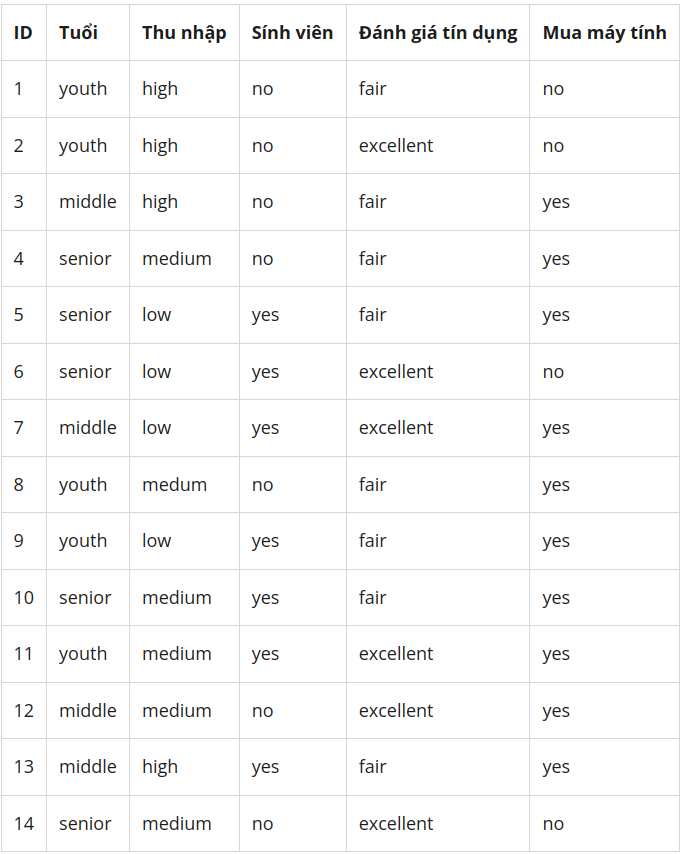

Câu hỏi là: Một sinh viên trẻ với thu nhập trung bình và mức đánh giá tín dụng bình thường sẽ mua một cái máy tính?

Biểu diễn bài toán phân loại:
- z = (Age=Youth,Income=Medium,Student=Yes,Credit_Rating=Fair)
- Có 2 phân lớp có thể: $c_1$ (“Mua máy tính”) và $c_2$ (“Không mua máy tính”)


1.   Tính giá trị xác suất tiên nghiệm $P(C)$ cho mỗi phân lớp $C$
  - $P(c_1) = 9/14$
  - $P(c_2) = 5/14$
2.   Tính giá trị xác suất của mỗi giá trị thuộc tính đối với mỗi phân lớp ($P(x_i|C)$)
  - Phân lớp $c_1$:
      - $P(Age=Youth|c_1) = 2/9$;
      - $P(Income=Medium|c_1) = 4/9$;
      - $P(Student=Yes|c_1) = 6/9$;
      - $P(Credit_Rating=Fair|c_1) = 6/9$;
  - Phân lớp $c_2$:
      - $P(Age=Youth|c_2) = 3/5$
      - $P(Income=Medium|c_2) = 2/5$
      - $P(Student=Yes|c_2) = 1/5$
      - $P(Credit_Rating=Fair|c_2) = 2/5$
3.   Sử dụng các xác suất này để tính $P(C|X)$ cho mỗi lớp $C$
  - Đối với phân lớp $c_1$: $P(z|c_1) = 2/9 * 4/9 * 6/9 * 6/9 = 0.044$
  - Đối với phân lớp $c_2$: $P(z|c_2) = 3/5 * 2/5 * 1/5 * 2/5 = 0.019$
      
4.   Xác định phân lớp có thể nhất - lớp có xác suất $P(C|X)$ cao nhất
  - Đối với phân lớp $c_1$: $P(c_1).P(z|c_1) = (9/14).(0.044) = 0.028$
  - Đối với phân lớp $c_2$: $P(c_2).P(z|c_2) = (5/14).(0.019) = 0.007$

=> Sinh viên trẻ với thu nhập trung bình và mức đánh giá tin dụng bình thường sẽ mua một máy tính


# 2. Ví dụ minh họa

## 2.1. Import thư viện


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

## 2.2. Chuẩn bị dữ liệu

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
nb = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/diabetes.csv")

In [15]:
print(f"Number of line: {nb.shape[0]}")

Number of line: 768


In [16]:
nb.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
nb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
X = nb[feature_cols] # Features
y = nb.Outcome # Target variable

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## 2.3. Tạo model và huấn luyện

In [21]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

## 2.4. Đánh giá

In [22]:
y_pred = model.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7748917748917749
